<a href="https://colab.research.google.com/github/coder-rakeshpaul/EmotionAnalysis/blob/main/Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns
import nltk
import string
import re
import inflect

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Reading the data amd converting it into a dataframe

In [14]:
df1 = pd.read_csv('https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv')
df2 = pd.read_csv('https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv')
df3 = pd.read_csv('https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv')
frames = [df1, df2, df3]
data = pd.concat(frames)

Droping unnecessary columns

In [15]:
data=data.drop(['id','author','subreddit','link_id','parent_id','created_utc','rater_id','example_very_unclear'], axis=1)
data.shape

(211225, 29)

Droping the duplicates

In [16]:
data.drop_duplicates(subset='text', inplace=True)
data.reset_index(drop=True, inplace=True)
data.shape

(57732, 29)

Droping data with mixed emotions

In [17]:
sum = np.array(data.sum(axis=1))
ind = np.where(np.logical_or(sum>1, sum==0))[0].tolist()
data.drop(ind, inplace = True)
data.reset_index(drop=True, inplace=True)
data.shape

C:\Users\mayur\AppData\Local\Temp\ipykernel_16536\1218242578.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum = np.array(data.sum(axis=1))


(46741, 29)

Creating a list of emotions

In [18]:
emotions = list(data.columns)[1:]

In [19]:
emo = []
for text in range(0, data.shape[0]):
  for emotion in emotions:
    if data.loc[text][emotion] == 1:
      emo.append(emotion)


In [20]:
data.drop(data.iloc[:, 1:29], inplace=True, axis=1)

In [21]:
data

,text
0,That game hurt.
1,"You do right, if you don't care then fuck 'em!"
2,Man I love reddit.
3,"[NAME] was nowhere near them, he was by the Fa..."
4,Right? Considering it’s such an important docu...
...,...
46736,Oh [NAME] i forgot about those. I used to love...
46737,I didn’t even notice that one. I noticed the b...
46738,"Thanks, [NAME]"
46739,Everyone likes [NAME].


In [22]:
data['Emotions']= emo

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Emotion_id'] = le.fit_transform(data['Emotions'])

data

,text,Emotions,Emotion_id
0,That game hurt.,sadness,26
1,"You do right, if you don't care then fuck 'em!",neutral,20
2,Man I love reddit.,love,18
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20
4,Right? Considering it’s such an important docu...,gratitude,15
...,...,...,...
46736,Oh [NAME] i forgot about those. I used to love...,love,18
46737,I didn’t even notice that one. I noticed the b...,neutral,20
46738,"Thanks, [NAME]",gratitude,15
46739,Everyone likes [NAME].,love,18


c:\Users\mayur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Emotion_id'>

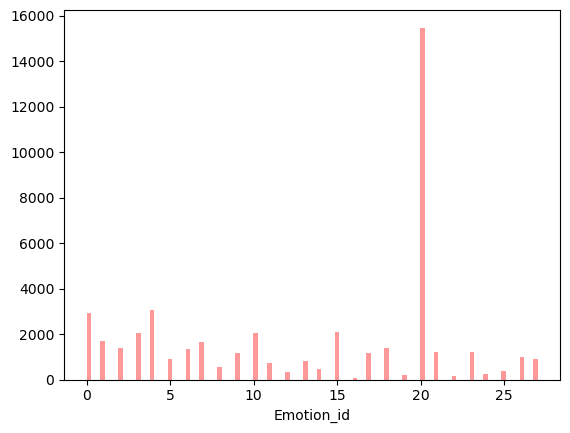

In [23]:
from seaborn import distplot

distplot(data['Emotion_id'], kde=False, color='red', bins=100)

Preprocessing the data

In [24]:
def text_lowercase(text):
	return text.lower()
 
import string
# remove punctuation
def remove_punctuation(text):
	return text.translate(str.maketrans('', '', string.punctuation))

Removing stop words

In [25]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
# remove stopwords function
def remove_stopwords_tokenize_and_stem(text):
	stop_words = set(stopwords.words("english"))
	word_tokens = word_tokenize(text)
	filtered_text = [word for word in word_tokens if word not in stop_words]
	stems = [stemmer.stem(word) for word in filtered_text]
	return stems

Stemming the data

In [26]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()

# stem words in the list of tokenized words
def stem_words(text):
	word_tokens = word_tokenize(text)
	stems = [stemmer.stem(word) for word in word_tokens]
	return stems

In [27]:
def text_preprocess(text):
  t = remove_punctuation(text)
  t = text_lowercase(t)
  t = remove_stopwords_tokenize_and_stem(t)
  return t

In [28]:
data

,text,Emotions,Emotion_id
0,That game hurt.,sadness,26
1,"You do right, if you don't care then fuck 'em!",neutral,20
2,Man I love reddit.,love,18
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20
4,Right? Considering it’s such an important docu...,gratitude,15
...,...,...,...
46736,Oh [NAME] i forgot about those. I used to love...,love,18
46737,I didn’t even notice that one. I noticed the b...,neutral,20
46738,"Thanks, [NAME]",gratitude,15
46739,Everyone likes [NAME].,love,18


In [29]:
data['tokenized'] = data.apply(lambda x: text_preprocess(x['text']), axis=1)

In [30]:
data

,text,Emotions,Emotion_id,tokenized
0,That game hurt.,sadness,26,"[game, hurt]"
1,"You do right, if you don't care then fuck 'em!",neutral,20,"[right, dont, care, fuck, em]"
2,Man I love reddit.,love,18,"[man, love, reddit]"
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20,"[name, nowher, near, falcon]"
4,Right? Considering it’s such an important docu...,gratitude,15,"[right, consid, ’, import, document, know, dam..."
...,...,...,...,...
46736,Oh [NAME] i forgot about those. I used to love...,love,18,"[oh, name, forgot, use, love]"
46737,I didn’t even notice that one. I noticed the b...,neutral,20,"[’, even, notic, one, notic, bottom, right, one]"
46738,"Thanks, [NAME]",gratitude,15,"[thank, name]"
46739,Everyone likes [NAME].,love,18,"[everyon, like, name]"


**Removing rows in which the token list is empty (this occurs due to stemming)**

In [31]:
emp_token_ind = []

tokens = data['tokenized'].to_numpy()
for i in range(0, tokens.size):
    if len(tokens[i]) == 0:
        emp_token_ind.append(i)

data.drop(emp_token_ind ,axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

In [32]:
data

,text,Emotions,Emotion_id,tokenized
0,That game hurt.,sadness,26,"[game, hurt]"
1,"You do right, if you don't care then fuck 'em!",neutral,20,"[right, dont, care, fuck, em]"
2,Man I love reddit.,love,18,"[man, love, reddit]"
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20,"[name, nowher, near, falcon]"
4,Right? Considering it’s such an important docu...,gratitude,15,"[right, consid, ’, import, document, know, dam..."
...,...,...,...,...
46637,Oh [NAME] i forgot about those. I used to love...,love,18,"[oh, name, forgot, use, love]"
46638,I didn’t even notice that one. I noticed the b...,neutral,20,"[’, even, notic, one, notic, bottom, right, one]"
46639,"Thanks, [NAME]",gratitude,15,"[thank, name]"
46640,Everyone likes [NAME].,love,18,"[everyon, like, name]"


In [33]:
import gensim
from gensim.models import Word2Vec, KeyedVectors

model = Word2Vec(window=5, min_count=1, workers=4, sg=0)

model.build_vocab(data['tokenized'], progress_per=1000)
model.train(data['tokenized'], total_examples=model.corpus_count, epochs=model.epochs)

model.save("./text.model")

In [34]:
model.wv.most_similar('best')
(model.wv['game'] + model.wv['hurt'])/2

array([-0.24714997,  0.3763563 ,  0.33402038,  0.29230085,  0.21662268,
       -1.0962281 ,  0.22528604,  1.2550234 , -0.847237  , -0.45665532,
       -0.38500008, -0.6951548 , -0.23915628,  0.2900486 ,  0.19498497,
       -0.35366502, -0.17187366, -0.52492404, -0.12401633, -1.1418847 ,
        0.38822365,  0.2088257 ,  0.48258322, -0.6513941 , -0.1239507 ,
       -0.01371156, -0.08657651, -0.41938484, -0.63562953, -0.05809261,
        0.62522644,  0.17146182,  0.40953398, -0.48190928, -0.02311178,
        0.9093884 , -0.18507874, -0.57489276, -0.46909946, -1.0228376 ,
        0.15946528, -0.43890655, -0.36876902,  0.17435479,  0.43711066,
       -0.28138006, -0.31235   , -0.1697917 ,  0.34997404,  0.64377373,
        0.3678166 , -0.23366395, -0.31301308, -0.00157481, -0.42875054,
        0.3207389 ,  0.32699215, -0.00568381, -0.6068968 ,  0.19927424,
        0.03346918,  0.3128084 , -0.21775217, -0.0616007 , -0.46058285,
        0.48575932,  0.14685485,  0.58328986, -0.9125644 ,  0.73

Vectorize the tokenized lists

In [35]:
inputs = []

for token in data['tokenized']:
    inputs.append(model.wv[token])

data['Inputs'] = inputs


In [36]:
print(data['Inputs'][0])

[[-3.23168844e-01  2.93941408e-01  5.16052067e-01  4.31392968e-01
   3.07961464e-01 -1.35991597e+00  3.66283953e-01  1.30305529e+00
  -1.17543983e+00 -5.01802146e-01 -5.46562552e-01 -6.59910202e-01
  -2.71060824e-01  3.26410592e-01  1.71859011e-01 -4.69478697e-01
  -3.61605942e-01 -6.10571921e-01 -3.11689198e-01 -1.31680393e+00
   4.83299732e-01  2.05271870e-01  5.70640326e-01 -8.42132449e-01
  -1.68263108e-01 -6.78365901e-02  1.26497401e-03 -5.23867011e-01
  -7.49642789e-01 -1.20785445e-01  6.75441206e-01  3.39838237e-01
   5.58207631e-01 -4.32472378e-01 -2.46664584e-02  1.20020080e+00
  -3.32178891e-01 -6.49456978e-01 -5.42897642e-01 -1.28680480e+00
   1.77233458e-01 -5.14433980e-01 -4.33529496e-01  2.85147995e-01
   4.28862423e-01 -3.00640076e-01 -2.75366873e-01 -3.31198841e-01
   4.44263935e-01  8.36629450e-01  5.01316905e-01 -1.24628775e-01
  -3.46174210e-01  1.40420645e-01 -5.31027973e-01  4.36797500e-01
   3.37894589e-01 -2.10626610e-02 -7.09745288e-01  7.96795338e-02
   1.20332

Perform **Average Word2Vec** on the input column

In [37]:
inputs = []
for input in data['Inputs']:
    sum = 0
    for i in input:
        sum = sum + i
    avg = sum/len(input)
    inputs.append(avg)

data['Inputs'] = inputs


In [39]:
data

,text,Emotions,Emotion_id,tokenized,Inputs
0,That game hurt.,sadness,26,"[game, hurt]","[-0.24714997, 0.3763563, 0.33402038, 0.2923008..."
1,"You do right, if you don't care then fuck 'em!",neutral,20,"[right, dont, care, fuck, em]","[-0.07457395, 0.6170758, 0.11815772, 0.1322848..."
2,Man I love reddit.,love,18,"[man, love, reddit]","[-0.21043481, 0.45753253, 0.21583895, 0.302227..."
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20,"[name, nowher, near, falcon]","[-0.085021414, 0.15487182, 0.18884279, 0.20029..."
4,Right? Considering it’s such an important docu...,gratitude,15,"[right, consid, ’, import, document, know, dam...","[-0.13037217, 0.5357495, 0.07477555, 0.1476951..."
...,...,...,...,...,...
46637,Oh [NAME] i forgot about those. I used to love...,love,18,"[oh, name, forgot, use, love]","[-0.19152609, 0.4453457, 0.2607872, 0.31601018..."
46638,I didn’t even notice that one. I noticed the b...,neutral,20,"[’, even, notic, one, notic, bottom, right, one]","[-0.14381416, 0.58646774, 0.1676167, 0.1992540..."
46639,"Thanks, [NAME]",gratitude,15,"[thank, name]","[-0.26295233, 0.36803508, 0.2292174, 0.4149090..."
46640,Everyone likes [NAME].,love,18,"[everyon, like, name]","[-0.13424815, 0.55050105, 0.21493156, 0.357237..."


In [40]:
data.to_csv('tokenized_text.csv')

In [41]:
df = pd.read_csv('tokenized_text.csv')
df

,Unnamed: 0,text,Emotions,Emotion_id,tokenized,Inputs
0,0,That game hurt.,sadness,26,"['game', 'hurt']",[-0.24714997 0.3763563 0.33402038 0.292300...
1,1,"You do right, if you don't care then fuck 'em!",neutral,20,"['right', 'dont', 'care', 'fuck', 'em']",[-0.07457395 0.6170758 0.11815772 0.132284...
2,2,Man I love reddit.,love,18,"['man', 'love', 'reddit']",[-0.21043481 0.45753253 0.21583895 0.302227...
3,3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20,"['name', 'nowher', 'near', 'falcon']",[-0.08502141 0.15487182 0.18884279 0.200299...
4,4,Right? Considering it’s such an important docu...,gratitude,15,"['right', 'consid', '’', 'import', 'document',...",[-1.3037217e-01 5.3574950e-01 7.4775547e-02 ...
...,...,...,...,...,...,...
46637,46637,Oh [NAME] i forgot about those. I used to love...,love,18,"['oh', 'name', 'forgot', 'use', 'love']",[-0.19152609 0.4453457 0.2607872 0.316010...
46638,46638,I didn’t even notice that one. I noticed the b...,neutral,20,"['’', 'even', 'notic', 'one', 'notic', 'bottom...",[-0.14381416 0.58646774 0.1676167 0.199254...
46639,46639,"Thanks, [NAME]",gratitude,15,"['thank', 'name']",[-0.26295233 0.36803508 0.2292174 0.414909...
46640,46640,Everyone likes [NAME].,love,18,"['everyon', 'like', 'name']",[-0.13424815 0.55050105 0.21493156 0.357237...
